<a href="https://colab.research.google.com/github/kimsooyoung/iap_hanyang/blob/main/tutorial02_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.autograd import grad

x1 = torch.tensor(2, requires_grad=True, dtype=torch.float32)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float32)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float32)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float32)

In [ ]:
z1 = x1*x2
z2 = x3*x4

f = z1 + z2

# 1 grad 함수 사용하기
df_dx = grad(outputs=f, inputs=[x1,x2,x3,x4])
df_dz = grad(outputs=f, inputs=[z1,z2])

In [ ]:
# 이건 grad 쓸때 예시임 위에 고치고 오자
print(f'gradient of x1 = {df_dx[0]}')
print(f'gradient of x2 = {df_dx[1]}')
print(f'gradient of x3 = {df_dx[2]}')
print(f'gradient of x4 = {df_dx[3]}')

print(f'gradient of z1 = {df_dz[0]}')
print(f'gradient of z2 = {df_dz[1]}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0
gradient of z1 = 1.0
gradient of z2 = 1.0


In [ ]:
# 2 backward 함수 사용하기
# 이거 할때는 grad를 쓰면 안된다.

z1 = x1*x2
z2 = x3*x4

f = z1 + z2

f.backward() # a more convenient way to invoke backward pass
print(x1.grad)
print(x2.grad)
print(x3.grad)
print(x4.grad)

print(z1.grad)
print(z2.grad)

tensor(9.)
tensor(6.)
tensor(12.)
tensor(3.)
None
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [ ]:
x = torch.tensor([1.0], requires_grad=True)
y = x * 2
y.requires_grad

True

In [ ]:
x = torch.tensor([1.0], requires_grad=True)

# 특정 변수를 고정시켜두고 보고 싶은 경우,
# 아래를 보면 requires_grad가 false가 된 것을 볼 수 있다.
with torch.no_grad():
    y = x * 2
y.requires_grad

False

In [ ]:
x = torch.tensor([1.0], requires_grad=True)
with torch.no_grad():
    with torch.enable_grad():
        y = x * 2
y.requires_grad

True

# Autograd Ex2: Solving a Linear Problem

In [ ]:
import numpy as np

a_ref = -1.5
b_ref = 8
noise = 0.2 * np.random.randn(50)

In [ ]:
#Generate data
x = np.linspace(1,4,50)
y = a_ref * x + b_ref + noise
x

array([1.        , 1.06122449, 1.12244898, 1.18367347, 1.24489796,
       1.30612245, 1.36734694, 1.42857143, 1.48979592, 1.55102041,
       1.6122449 , 1.67346939, 1.73469388, 1.79591837, 1.85714286,
       1.91836735, 1.97959184, 2.04081633, 2.10204082, 2.16326531,
       2.2244898 , 2.28571429, 2.34693878, 2.40816327, 2.46938776,
       2.53061224, 2.59183673, 2.65306122, 2.71428571, 2.7755102 ,
       2.83673469, 2.89795918, 2.95918367, 3.02040816, 3.08163265,
       3.14285714, 3.20408163, 3.26530612, 3.32653061, 3.3877551 ,
       3.44897959, 3.51020408, 3.57142857, 3.63265306, 3.69387755,
       3.75510204, 3.81632653, 3.87755102, 3.93877551, 4.        ])

In [ ]:
def MSE_loss(pred, label):
    return (pred - label).pow(2).mean()

In [ ]:
#Get data as torch.tensors
xx = torch.tensor(x, dtype=torch.float32)
yy = torch.tensor(y, dtype=torch.float32)

#Create our unknown variables
# a,b는 아무거나 넣은 것임
a = torch.tensor(0, requires_grad=True, dtype=torch.float32)
b = torch.tensor(199, requires_grad=True, dtype=torch.float32)

In [ ]:
# Training loop
# SGD 사용
numbOfEpoch = 10000
learning_rate = 0.01
for ii in range(numbOfEpoch):
    y_pred = a * xx + b
    loss = MSE_loss(pred=y_pred, label=yy)
    loss.backward()
    
    #Gradient descent update
    with torch.no_grad():
        a = a - learning_rate * a.grad
        b = b - learning_rate * b.grad
        
    a.requires_grad = True
    b.requires_grad = True
    if ii%1000 == 0 or ii == (numbOfEpoch - 1):
        print(f'ii={ii:5d} | loss = {loss:.2f} | a = {a:.2f} | b = {b:.2f}')
    
print(a)
print(b)

ii=    0 | loss = 37947.69 | a = -9.76 | b = 195.10
ii= 1000 | loss = 61.50 | a = -9.95 | b = 31.40
ii= 2000 | loss = 1.23 | a = -2.67 | b = 11.21
ii= 3000 | loss = 0.06 | a = -1.66 | b = 8.39
ii= 4000 | loss = 0.04 | a = -1.52 | b = 8.00
ii= 5000 | loss = 0.04 | a = -1.50 | b = 7.94
ii= 6000 | loss = 0.04 | a = -1.49 | b = 7.94
ii= 7000 | loss = 0.04 | a = -1.49 | b = 7.94
ii= 8000 | loss = 0.04 | a = -1.49 | b = 7.94
ii= 9000 | loss = 0.04 | a = -1.49 | b = 7.94
ii= 9999 | loss = 0.04 | a = -1.49 | b = 7.94
tensor(-1.4932, requires_grad=True)
tensor(7.9359, requires_grad=True)


## My Practice

In [113]:
import torch
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

a = 0.5
b = 3

x = np.linspace(1, 10, 100)
noise = 0.3 * np.random.randn(100)
y_noisy = a * x + b + noise

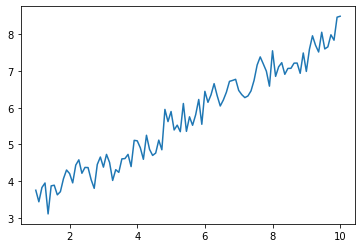

In [108]:
fig = plt.figure()
plt.plot(x, y_noisy)

In [118]:
tensor_a = torch.tensor(0, requires_grad=True, dtype=torch.float32)
tensor_b = torch.tensor(0, requires_grad=True, dtype=torch.float32)

tensor_x = torch.tensor(x, dtype=torch.float32)
tensor_y = torch.tensor(y_noisy, dtype=torch.float32)

epoch = 1000
learning_rate = 0.02

def MSE_ERR(pred_val, dataset_val):
  return (pred_val - dataset_val).pow(2).mean()

for i in range(epoch):
  y_pred = tensor_x * tensor_a + tensor_b
  loss = MSE_ERR(y_pred, tensor_y)
  loss.backward()

  with torch.no_grad():
    tensor_a = tensor_a - tensor_a.grad * learning_rate
    tensor_b = tensor_b - tensor_b.grad * learning_rate
  
  tensor_a.requires_grad = True
  tensor_b.requires_grad = True

  if i % 100 == 0 or i == (epoch - 1):
    print(f"i : {i} / loss : {loss:.5f} / tensor_a : {tensor_a:.5f} / tensor_b : {tensor_b:.5f}")



i : 0 / loss : 34.72024 / tensor_a : 1.40097 / tensor_b : 0.22938
i : 100 / loss : 0.41471 / tensor_a : 0.70668 / tensor_b : 1.60312
i : 200 / loss : 0.15231 / tensor_a : 0.60287 / tensor_b : 2.30064
i : 300 / loss : 0.09117 / tensor_a : 0.55276 / tensor_b : 2.63732
i : 400 / loss : 0.07693 / tensor_a : 0.52857 / tensor_b : 2.79983
i : 500 / loss : 0.07361 / tensor_a : 0.51690 / tensor_b : 2.87827
i : 600 / loss : 0.07284 / tensor_a : 0.51126 / tensor_b : 2.91613
i : 700 / loss : 0.07266 / tensor_a : 0.50854 / tensor_b : 2.93441
i : 800 / loss : 0.07261 / tensor_a : 0.50723 / tensor_b : 2.94323
i : 900 / loss : 0.07260 / tensor_a : 0.50660 / tensor_b : 2.94749
i : 999 / loss : 0.07260 / tensor_a : 0.50629 / tensor_b : 2.94953
